# Real-time Implementation and Automation with FXCM 

---------------------------------------------

_Disclaimer: <br>
The following illustrative examples are for general information and educational purposes only. <br>
It is neither investment advice nor a recommendation to trade, invest or take whatsoever actions.<br>
The below code should only be used in combination with an FXCM Practice/Demo Account and NOT with a Live Trading Account._

----------------------------------------------------

## Recap: Historical Data, real-time Data and Orders

In [1]:
import pandas as pd
import fxcmpy

In [2]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [3]:
api.get_candles("EUR/USD", start = "2020-07-01", end = "2020-07-31",  period = "D1")

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2020-07-02 21:00:00,1.12500,1.12385,1.13021,1.12227,1.12522,1.12404,1.13032,1.12239,315698
2020-07-03 21:00:00,1.12385,1.12428,1.12506,1.12186,1.12404,1.12498,1.12544,1.12197,245002
2020-07-05 21:00:00,1.12428,1.12401,1.12434,1.12400,1.12498,1.12478,1.12514,1.12462,75
2020-07-06 21:00:00,1.12401,1.13085,1.13448,1.12401,1.12478,1.13100,1.13461,1.12478,268594
2020-07-07 21:00:00,1.13085,1.12725,1.13320,1.12581,1.13100,1.12748,1.13331,1.12594,296689
2020-07-08 21:00:00,1.12725,1.13289,1.13513,1.12617,1.12748,1.13309,1.13522,1.12629,289464
2020-07-09 21:00:00,1.13289,1.12839,1.13700,1.12796,1.13309,1.12856,1.13713,1.12808,338430
2020-07-10 21:00:00,1.12839,1.12966,1.13241,1.12543,1.12856,1.13020,1.13254,1.12553,258916
2020-07-12 21:00:00,1.12966,1.13020,1.13059,1.12950,1.13020,1.13079,1.13120,1.13025,148


In [4]:
api.get_candles("EUR/USD", number = 10, period = "m1")

,bidopen,bidclose,bidhigh,bidlow,askopen,askclose,askhigh,asklow,tickqty
date,,,,,,,,,
2022-08-10 05:14:00,1.02138,1.02134,1.02138,1.02134,1.02150,1.02146,1.02150,1.02146,26
2022-08-10 05:15:00,1.02131,1.02137,1.02141,1.02131,1.02144,1.02149,1.02154,1.02144,45
2022-08-10 05:16:00,1.02136,1.02136,1.02138,1.02134,1.02149,1.02148,1.02150,1.02146,26
2022-08-10 05:17:00,1.02133,1.02133,1.02135,1.02128,1.02147,1.02146,1.02147,1.02141,32
2022-08-10 05:18:00,1.02133,1.02133,1.02134,1.02127,1.02145,1.02146,1.02147,1.02139,51
2022-08-10 05:19:00,1.02132,1.02133,1.02134,1.02132,1.02145,1.02146,1.02147,1.02145,36
2022-08-10 05:20:00,1.02133,1.02137,1.02139,1.02133,1.02145,1.02149,1.02151,1.02145,95
2022-08-10 05:21:00,1.02136,1.02139,1.02139,1.02133,1.02149,1.02151,1.02152,1.02146,39
2022-08-10 05:22:00,1.02138,1.02139,1.02139,1.02137,1.02151,1.02151,1.02151,1.02149,11


In [5]:
api.subscribe_market_data("EUR/USD")

In [6]:
api.get_subscribed_symbols()

['EUR/USD']

In [18]:
api.unsubscribe_market_data("EUR/USD")

In [7]:
def print_data(data, dataframe):
    print('%3d | %s | %s, %s, %s'
          % (len(dataframe), data['Symbol'],
             pd.to_datetime(int(data['Updated']), unit='ms'),
             data['Rates'][0], data['Rates'][1]))

In [8]:
api.subscribe_market_data("EUR/USD", (print_data, ))

In [9]:
api.unsubscribe_market_data("EUR/USD")

In [10]:
api.get_open_positions()

""


In [11]:
api.create_market_buy_order("EUR/USD", 100)

In [12]:
order = api.create_market_buy_order("EUR/USD", 100)

In [13]:
order.get_time()

datetime.datetime(2022, 8, 10, 5, 24, 0, 421000)

In [14]:
order.get_isBuy()

True

In [15]:
order.get_currency()

'EUR/USD'

In [16]:
col = ["tradeId", "amountK", "currency", "grossPL", "isBuy"]

In [17]:
api.get_open_positions()[col]

,tradeId,amountK,currency,grossPL,isBuy
0,73277368,100,EUR/USD,-14,True
1,73277369,100,EUR/USD,-14,True


In [18]:
api.create_market_sell_order("EUR/USD", 200)

In [19]:
api.get_open_positions()[col]

,tradeId,amountK,currency,grossPL,isBuy
0,73277368,100,EUR/USD,-14,True
1,73277369,100,EUR/USD,-14,True
2,73277371,200,EUR/USD,-20,False


In [20]:
api.close_all_for_symbol("EUR/USD")

In [21]:
api.get_open_positions()

""


In [22]:
api.get_closed_positions()[col]

,tradeId,amountK,currency,grossPL,isBuy
0,73277368,100,EUR/USD,-11,True
1,73277369,100,EUR/USD,-11,True
2,73277371,200,EUR/USD,-24,False


In [23]:
api.get_closed_positions_summary()[col]

,tradeId,amountK,currency,grossPL,isBuy
0,,400,EUR/USD,-46,False


In [24]:
api.get_accounts().T

,0
t,6
ratePrecision,0
accountId,1774532
balance,19954
usdMr,0
mc,N
mcDate,
accountName,1001774532
usdMr3,0
hedging,Y


In [25]:
api.close()

## Preview: A Trader Class live in action

In [26]:
import pandas as pd
import numpy as np
import fxcmpy
import time
from datetime import datetime

In [27]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [28]:
col = ["tradeId", "amountK", "currency", "grossPL", "isBuy"]

In [29]:
class ConTrader():
    
    def __init__(self, instrument, bar_length, window, units):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        self.units = units
        self.position = 0
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() 
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.raw_data.index[-1]  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["position"] = -np.sign(df.returns.rolling(self.window).mean())
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING LONG")  
            elif self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING LONG")  
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING SHORT")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING SHORT")  
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            self.position = 0

    def report_trade(self, order, going):  
        time = order.get_time()
        units = api.get_open_positions().amountK.iloc[-1]
        price = api.get_open_positions().open.iloc[-1]
        unreal_pl = api.get_open_positions().grossPL.sum()
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | Unreal. P&L = {}".format(time, units, price, unreal_pl))
        print(100 * "-" + "\n")
        

__Simple Contrarian: Bar_lenght = 1min | Window = 1 (1 minute)__

In [30]:
trader = ConTrader("EUR/USD", bar_length = "1min", window = 1, units = 100)

In [31]:
trader.get_most_recent()
api.subscribe_market_data(trader.instrument, (trader.get_tick_data, ))

1 2 3 4 5 6 7 8 9 10 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_10096\336370571.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


11 12 13 14 15 
----------------------------------------------------------------------------------------------------
2022-08-10 05:28:05.634000 | GOING LONG
2022-08-10 05:28:05.634000 | units = 100 | price = 1.0214 | Unreal. P&L = -10
----------------------------------------------------------------------------------------------------

16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_10096\336370571.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


31 

Exception in thread Thread-2712:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\Ashwin Dev\anaconda3\lib\http\client.py", line 1377, in getresponse
    response.begin()
  File "C:\Users\Ashwin Dev\anaconda3\lib\http\client.py", line 320, in begin
    version, status, reason = self._read_status()
  File "C:\Users\Ashwin Dev\anaconda3\lib\http\client.py", line 281, in _read_status
    line = str(self.fp.readline(_MAXLINE + 1), "iso-8859-1")
  File "C:\Users\Ashwin Dev\anaconda3\lib\socket.py", line 704, in read

32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 

In [32]:
api.unsubscribe_market_data(trader.instrument)
if len(api.get_open_positions()) != 0:
    api.close_all_for_symbol(trader.instrument)
    print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")
    time.sleep(20)
    print(api.get_closed_positions_summary()[col])
    trader.position = 0

47 

2022-08-10 05:30:03.058891 | GOING NEUTRAL

  tradeId  amountK currency  grossPL  isBuy
0              700  EUR/USD      -77  False


__Simple Contrarian: Bar_lenght = 1min | Window = 60 (1 hour)__

In [ ]:
trader = ConTrader("EUR/USD", bar_length = "1min", window = 60, units = 100)

In [ ]:
trader.get_most_recent()
api.subscribe_market_data(trader.instrument, (trader.get_tick_data, ))

In [ ]:
api.unsubscribe_market_data(trader.instrument)
if len(api.get_open_positions()) != 0:
    api.close_all_for_symbol(trader.instrument)
    print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")
    time.sleep(20)
    print(api.get_closed_positions_summary()[col])
    trader.position = 0

In [ ]:
api.close()

## Collecting and storing real-time tick data

In [1]:
import pandas as pd
import fxcmpy

In [2]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [3]:
def print_data(data, dataframe):
    print(dataframe)

In [4]:
api.subscribe_market_data("EUR/USD", (print_data, ))

                             Bid      Ask     High      Low
2022-08-12 12:58:23.753  1.02716  1.02719  1.02688  1.03437
2022-08-12 12:58:24.230  1.02710  1.02722  1.02686  1.03292
                             Bid      Ask     High      Low
2022-08-12 12:58:23.753  1.02716  1.02719  1.02688  1.03437
2022-08-12 12:58:24.230  1.02710  1.02722  1.02686  1.03292
2022-08-12 12:58:24.462  1.02710  1.02722  1.02686  1.03292
                             Bid      Ask     High      Low
2022-08-12 12:58:23.753  1.02716  1.02719  1.02688  1.03437
2022-08-12 12:58:24.230  1.02710  1.02722  1.02686  1.03292
2022-08-12 12:58:24.462  1.02710  1.02722  1.02686  1.03292
2022-08-12 12:58:26.083  1.02711  1.02723  1.02686  1.03292
                             Bid      Ask     High      Low
2022-08-12 12:58:23.753  1.02716  1.02719  1.02688  1.03437
2022-08-12 12:58:24.230  1.02710  1.02722  1.02686  1.03292
2022-08-12 12:58:24.462  1.02710  1.02722  1.02686  1.03292
2022-08-12 12:58:26.083  1.02711  1.0272

In [5]:
api.unsubscribe_market_data("EUR/USD")

                             Bid      Ask     High      Low
2022-08-12 12:58:23.753  1.02716  1.02719  1.02688  1.03437
2022-08-12 12:58:24.230  1.02710  1.02722  1.02686  1.03292
2022-08-12 12:58:24.462  1.02710  1.02722  1.02686  1.03292
2022-08-12 12:58:26.083  1.02711  1.02723  1.02686  1.03292
2022-08-12 12:58:26.620  1.02711  1.02724  1.02686  1.03292
2022-08-12 12:58:28.172  1.02711  1.02724  1.02686  1.03292
2022-08-12 12:58:28.765  1.02711  1.02724  1.02686  1.03292


In [6]:
tick_data = None

In [7]:
def get_tick_data(data, dataframe):
    
    global tick_data # global variable tick_data
    
    print('%3d | %s | %s, %s, %s'
          % (len(dataframe), data['Symbol'],
             pd.to_datetime(int(data['Updated']), unit='ms'),
             data['Rates'][0], data['Rates'][1]))
    
    tick_data = dataframe.iloc[:, :2]

In [8]:
api.subscribe_market_data("EUR/USD", (get_tick_data, ))

  2 | EUR/USD | 2022-08-12 12:58:57.828000, 1.02685, 1.02697
  3 | EUR/USD | 2022-08-12 12:58:59.349000, 1.02684, 1.02697
  4 | EUR/USD | 2022-08-12 12:58:59.614000, 1.02684, 1.02697
  5 | EUR/USD | 2022-08-12 12:59:00.313000, 1.02684, 1.02697
  6 | EUR/USD | 2022-08-12 12:59:01.428000, 1.02685, 1.02697
  7 | EUR/USD | 2022-08-12 12:59:02.898000, 1.02686, 1.02698
  8 | EUR/USD | 2022-08-12 12:59:03.292000, 1.02685, 1.02698
  9 | EUR/USD | 2022-08-12 12:59:04.774000, 1.02687, 1.0269899999999998


In [9]:
api.unsubscribe_market_data("EUR/USD")

 10 | EUR/USD | 2022-08-12 12:59:05.373000, 1.02687, 1.027
 11 | EUR/USD | 2022-08-12 12:59:06.153000, 1.02688, 1.02701
 12 | EUR/USD | 2022-08-12 12:59:06.846000, 1.02689, 1.0270199999999998
 13 | EUR/USD | 2022-08-12 12:59:07.624000, 1.02687, 1.0269899999999998
 14 | EUR/USD | 2022-08-12 12:59:08.384000, 1.02686, 1.0269899999999998
 15 | EUR/USD | 2022-08-12 12:59:10.441000, 1.02687, 1.0269899999999998
 16 | EUR/USD | 2022-08-12 12:59:11.012000, 1.02687, 1.027
 17 | EUR/USD | 2022-08-12 12:59:12.112000, 1.02688, 1.02701
 18 | EUR/USD | 2022-08-12 12:59:12.715000, 1.02688, 1.027


ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

 19 | EUR/USD | 2022-08-12 12:59:14.990000, 1.02686, 1.0269899999999998
 20 | EUR/USD | 2022-08-12 12:59:15.637000, 1.02684, 1.0269599999999999
 21 | EUR/USD | 2022-08-12 12:59:16.004000, 1.02685, 1.02697
 22 | EUR/USD | 2022-08-12 12:59:17.285000, 1.02687, 1.027


In [10]:
tick_data

,Bid,Ask
2022-08-12 12:58:57.828,1.02685,1.02697
2022-08-12 12:58:57.828,1.02685,1.02697
2022-08-12 12:58:59.349,1.02684,1.02697
2022-08-12 12:58:59.614,1.02684,1.02697
2022-08-12 12:59:00.313,1.02684,1.02697
2022-08-12 12:59:01.428,1.02685,1.02697
2022-08-12 12:59:02.898,1.02686,1.02698
2022-08-12 12:59:03.292,1.02685,1.02698
2022-08-12 12:59:04.774,1.02687,1.02699
2022-08-12 12:59:05.373,1.02687,1.02700


 23 | EUR/USD | 2022-08-12 12:59:20.300000, 1.02689, 1.02701
 24 | EUR/USD | 2022-08-12 12:59:22.902000, 1.02695, 1.02707


In [11]:
tick_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2022-08-12 12:58:57.828000 to 2022-08-12 12:59:22.902000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bid     24 non-null     float64
 1   Ask     24 non-null     float64
dtypes: float64(2)
memory usage: 576.0 bytes
 25 | EUR/USD | 2022-08-12 12:59:23.949000, 1.02692, 1.0270499999999998
 26 | EUR/USD | 2022-08-12 12:59:24.602000, 1.02694, 1.0270599999999999
 27 | EUR/USD | 2022-08-12 12:59:25.423000, 1.02692, 1.02704
 28 | EUR/USD | 2022-08-12 12:59:25.760000, 1.02692, 1.0270499999999998
 29 | EUR/USD | 2022-08-12 12:59:26.679000, 1.02698, 1.0271
 30 | EUR/USD | 2022-08-12 12:59:27.301000, 1.02697, 1.0271
 31 | EUR/USD | 2022-08-12 12:59:27.979000, 1.02698, 1.0271
 32 | EUR/USD | 2022-08-12 12:59:29.106000, 1.02699, 1.0271199999999998
 33 | EUR/USD | 2022-08-12 12:59:29.610000, 1.02699, 1.02711
 34 | EUR/USD | 2022-08-12 12:59:30.376000, 1.0270000000000001,

In [12]:
api.close()

 35 | EUR/USD | 2022-08-12 12:59:30.823000, 1.02699, 1.0271199999999998


## Storing and resampling real-time tick data (Part 1)

In [13]:
import pandas as pd
import fxcmpy

In [14]:
api = fxcmpy.fxcmpy(config_file = "fxcm.cfg")

In [15]:
tick_data = None
resamp = None
bar_length = "10s"

In [16]:
def get_tick_data(data, dataframe):
    
    global tick_data, resamp # global variables
    
    print('%3d | %s | %s, %s, %s'
          % (len(dataframe), data['Symbol'],
             pd.to_datetime(int(data['Updated']), unit='ms'),
             data['Rates'][0], data['Rates'][1]))
    
    tick_data = dataframe.iloc[:, :2]
    resamp = tick_data.resample(bar_length, label = "right").last().ffill().iloc[:-1]
    resamp["Mid"] = (resamp.Ask + resamp.Bid)/2

In [17]:
api.subscribe_market_data("EUR/USD", (get_tick_data, ))

  2 | EUR/USD | 2022-08-12 13:44:52.020000, 1.0271000000000001, 1.02724
  3 | EUR/USD | 2022-08-12 13:44:53.236000, 1.02711, 1.02724
  4 | EUR/USD | 2022-08-12 13:44:54.205000, 1.0271000000000001, 1.02724
  5 | EUR/USD | 2022-08-12 13:44:55.393000, 1.02711, 1.02725
  6 | EUR/USD | 2022-08-12 13:44:56.218000, 1.02711, 1.02725
  7 | EUR/USD | 2022-08-12 13:44:56.992000, 1.02712, 1.02724
  8 | EUR/USD | 2022-08-12 13:44:58.122000, 1.02709, 1.0272199999999998
  9 | EUR/USD | 2022-08-12 13:44:58.703000, 1.0270700000000001, 1.0272
 10 | EUR/USD | 2022-08-12 13:44:59.651000, 1.02709, 1.0272199999999998
 11 | EUR/USD | 2022-08-12 13:45:00.529000, 1.0271000000000001, 1.02724
 12 | EUR/USD | 2022-08-12 13:45:01.739000, 1.0271000000000001, 1.02725
 13 | EUR/USD | 2022-08-12 13:45:02.515000, 1.0271000000000001, 1.02724
 14 | EUR/USD | 2022-08-12 13:45:03.532000, 1.02708, 1.0272199999999998
 15 | EUR/USD | 2022-08-12 13:45:04.392000, 1.0271000000000001, 1.02725
 16 | EUR/USD | 2022-08-12 13:45:05.6

In [18]:
api.unsubscribe_market_data("EUR/USD")

 54 | EUR/USD | 2022-08-12 13:45:36.703000, 1.02701, 1.02714
 55 | EUR/USD | 2022-08-12 13:45:37.657000, 1.0270000000000001, 1.02714
 56 | EUR/USD | 2022-08-12 13:45:37.865000, 1.02701, 1.02714
 57 | EUR/USD | 2022-08-12 13:45:38.790000, 1.02701, 1.02714
 58 | EUR/USD | 2022-08-12 13:45:39.743000, 1.02703, 1.0271599999999999
 59 | EUR/USD | 2022-08-12 13:45:40.438000, 1.02703, 1.02717
 60 | EUR/USD | 2022-08-12 13:45:41.335000, 1.02705, 1.02717
 61 | EUR/USD | 2022-08-12 13:45:42.219000, 1.02705, 1.02718
 62 | EUR/USD | 2022-08-12 13:45:42.986000, 1.02703, 1.02717
 63 | EUR/USD | 2022-08-12 13:45:44.091000, 1.02703, 1.02717
 64 | EUR/USD | 2022-08-12 13:45:44.814000, 1.02703, 1.02717
 65 | EUR/USD | 2022-08-12 13:45:45.635000, 1.02704, 1.02717
 66 | EUR/USD | 2022-08-12 13:45:47.382000, 1.02706, 1.02718
 67 | EUR/USD | 2022-08-12 13:45:48.413000, 1.02706, 1.0271899999999998
 68 | EUR/USD | 2022-08-12 13:45:49.069000, 1.02705, 1.0271899999999998
 69 | EUR/USD | 2022-08-12 13:45:49.81800

In [19]:
tick_data

,Bid,Ask
2022-08-12 13:44:51.501,1.02709,1.02722
2022-08-12 13:44:52.020,1.02710,1.02724
2022-08-12 13:44:53.236,1.02711,1.02724
2022-08-12 13:44:54.205,1.02710,1.02724
2022-08-12 13:44:55.393,1.02711,1.02725
...,...,...
2022-08-12 13:45:45.635,1.02704,1.02717
2022-08-12 13:45:47.382,1.02706,1.02718
2022-08-12 13:45:48.413,1.02706,1.02719
2022-08-12 13:45:49.069,1.02705,1.02719


In [20]:
resamp

,Bid,Ask,Mid
2022-08-12 13:45:00,1.02709,1.02722,1.027155
2022-08-12 13:45:10,1.02709,1.02723,1.027160
2022-08-12 13:45:20,1.02697,1.02709,1.027030
2022-08-12 13:45:30,1.02703,1.02715,1.027090
2022-08-12 13:45:40,1.02703,1.02716,1.027095


In [21]:
api.close()

## A Contrader Class

In [1]:
import pandas as pd
import fxcmpy

In [2]:
api = fxcmpy.fxcmpy(config_file = "fxcm.cfg")

In [3]:
class ConTrader():
    def __init__(self, instrument, bar_length):
        self.instrument = instrument
        self.bar_length = bar_length
        self.tick_data = None
        self.data = None
        self.ticks = 0 # running Tick number
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ") # Print running Tick number
        
        # collect and store tick data (mid-price only)
        self.tick_data = dataframe.iloc[:, :2].copy()
        self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
        self.tick_data = self.tick_data[self.instrument].to_frame()
        
        self.resample_and_join()
            
    def resample_and_join(self):
        self.data = self.tick_data.resample(self.bar_length, label = "right").last().ffill().iloc[:-1]

In [4]:
for i in range(10):
    print(i, end = " ")

0 1 2 3 4 5 6 7 8 9 

In [5]:
trader = ConTrader("EUR/USD", "10s")

In [6]:
trader

In [7]:
api.subscribe_market_data("EUR/USD", (trader.get_tick_data, ))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 

In [8]:
api.unsubscribe_market_data("EUR/USD")

33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 

packet queue is empty, aborting


75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 

In [9]:
trader.data

,EUR/USD
2022-08-22 16:33:20,0.994300
2022-08-22 16:33:30,0.994365
2022-08-22 16:33:40,0.994460
2022-08-22 16:33:50,0.994500
2022-08-22 16:34:00,0.994575
2022-08-22 16:34:10,0.994575
2022-08-22 16:34:20,0.994545
2022-08-22 16:34:30,0.994500
2022-08-22 16:34:40,0.994520


In [10]:
trader.tick_data

,EUR/USD
2022-08-22 16:33:10.901,0.994345
2022-08-22 16:33:12.580,0.994305
2022-08-22 16:33:13.411,0.994310
2022-08-22 16:33:14.055,0.994305
2022-08-22 16:33:14.698,0.994290
...,...
2022-08-22 16:34:37.468,0.994525
2022-08-22 16:34:38.099,0.994560
2022-08-22 16:34:39.025,0.994520
2022-08-22 16:34:42.368,0.994515


In [11]:
api.close()

## Storing and resampling real-time tick data (Part 2)

__When should we resample?__<br>
Whenever there are more than 5s (__bar_length__) between the __most recent tick__ and __last full bar__. 

In [1]:
import pandas as pd
import fxcmpy
from datetime import datetime

In [2]:
api = fxcmpy.fxcmpy(config_file = "fxcm.cfg")

In [3]:
class ConTrader():
    def __init__(self, instrument, bar_length):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) # Pandas Timedelta Object
        self.tick_data = None
        self.data = None
        self.ticks = 0
        self.last_bar = pd.to_datetime(datetime.utcnow()) # Time at instantiation
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms") # Pandas Timestamp Object
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.iloc[:, :2].copy()
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            
    def resample_and_join(self):
        self.data = self.tick_data.resample(self.bar_length, label = "right").last().ffill().iloc[:-1]
        self.last_bar = self.data.index[-1]  # update time of last full bar

In [4]:
datetime.utcnow()

datetime.datetime(2022, 8, 22, 16, 42, 39, 883605)

In [5]:
pd.to_datetime(datetime.utcnow())

Timestamp('2022-08-22 16:42:40.561978')

In [6]:
pd.to_timedelta("10s")

Timedelta('0 days 00:00:10')

In [7]:
trader = ConTrader("EUR/USD", "10s")
api.subscribe_market_data("EUR/USD", (trader.get_tick_data, ))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 

In [8]:
api.unsubscribe_market_data("EUR/USD")

28 29 30 

In [9]:
trader.data

,EUR/USD
2022-08-22 16:42:50,0.994365
2022-08-22 16:43:00,0.994410
2022-08-22 16:43:10,0.994375


In [10]:
trader.tick_data

,EUR/USD
2022-08-22 16:42:49.189,0.994365
2022-08-22 16:42:50.355,0.994400
2022-08-22 16:42:51.167,0.994385
2022-08-22 16:42:51.553,0.994395
2022-08-22 16:42:53.483,0.994375
2022-08-22 16:42:54.539,0.994375
2022-08-22 16:42:55.183,0.994375
2022-08-22 16:42:55.920,0.994400
2022-08-22 16:42:56.666,0.994405
2022-08-22 16:42:58.658,0.994400


In [11]:
api.close()

## Storing and resampling real-time tick data (Part 3)

In [1]:
import pandas as pd
import fxcmpy
from datetime import datetime

In [2]:
api = fxcmpy.fxcmpy(config_file = "fxcm.cfg")

Goal: Only use/store the latests ticks since the (second) last full bar.

In [3]:
class ConTrader():
    def __init__(self, instrument, bar_length):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.data = pd.DataFrame() # NEW
        self.ticks = 0
        self.last_bar = pd.to_datetime(datetime.utcnow()) 
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            #self.tick_data = dataframe.iloc[:, :2].copy()
            # NEW: get most recent ticks since last full bar
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            
    def resample_and_join(self):
        #self.data = self.tick_data.resample(self.bar_length, label = "right").last().ffill().iloc[:-1]
        # NEW: append the most recent ticks (resampled) to self.data
        self.data = self.data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.data.index[-1]  

In [4]:
trader = ConTrader("EUR/USD", "10s")
api.subscribe_market_data("EUR/USD", (trader.get_tick_data, ))

1 2 3 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_20460\1452965747.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data = self.data.append(self.tick_data.resample(self.bar_length,


4 5 6 7 8 9 10 11 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_20460\1452965747.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data = self.data.append(self.tick_data.resample(self.bar_length,


12 13 14 15 16 17 18 19 20 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_20460\1452965747.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data = self.data.append(self.tick_data.resample(self.bar_length,


21 22 23 24 25 26 

In [5]:
api.unsubscribe_market_data("EUR/USD")

27 28 29 30 31 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_20460\1452965747.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.data = self.data.append(self.tick_data.resample(self.bar_length,


32 33 34 

In [6]:
trader.data

,EUR/USD
2022-08-22 16:52:50,0.993705
2022-08-22 16:53:00,0.993695
2022-08-22 16:53:10,0.993795
2022-08-22 16:53:20,0.993740


In [7]:
trader.tick_data

,EUR/USD
2022-08-22 16:53:10.971,0.993830
2022-08-22 16:53:11.591,0.993825
2022-08-22 16:53:12.616,0.993810
2022-08-22 16:53:13.122,0.993810
2022-08-22 16:53:14.024,0.993805
2022-08-22 16:53:14.614,0.993770
2022-08-22 16:53:16.008,0.993770
2022-08-22 16:53:16.636,0.993750
2022-08-22 16:53:17.299,0.993750
2022-08-22 16:53:17.915,0.993755


In [8]:
api.close()

## Working with historical data and real-time tick data (Part 1)

In [1]:
import pandas as pd
import fxcmpy

In [2]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [3]:
instrument = "EUR/USD"

In [7]:
df = api.get_candles(instrument, number = 10000, period = "m1", columns = ["bidclose", "askclose"])
df

,bidclose,askclose
date,,
2022-08-11 16:51:00,1.03312,1.03324
2022-08-11 16:52:00,1.03310,1.03323
2022-08-11 16:53:00,1.03286,1.03299
2022-08-11 16:54:00,1.03301,1.03313
2022-08-11 16:55:00,1.03291,1.03303
...,...,...
2022-08-22 16:54:00,0.99362,0.99374
2022-08-22 16:55:00,0.99344,0.99358
2022-08-22 16:56:00,0.99346,0.99359


In [8]:
df[instrument] = (df.bidclose + df.askclose) / 2

In [9]:
df

,bidclose,askclose,EUR/USD
date,,,
2022-08-11 16:51:00,1.03312,1.03324,1.033180
2022-08-11 16:52:00,1.03310,1.03323,1.033165
2022-08-11 16:53:00,1.03286,1.03299,1.032925
2022-08-11 16:54:00,1.03301,1.03313,1.033070
2022-08-11 16:55:00,1.03291,1.03303,1.032970
...,...,...,...
2022-08-22 16:54:00,0.99362,0.99374,0.993680
2022-08-22 16:55:00,0.99344,0.99358,0.993510
2022-08-22 16:56:00,0.99346,0.99359,0.993525


In [10]:
df = df[instrument].to_frame()

In [11]:
df = df.resample("20min", label = "right").last().dropna().iloc[:-1]
df

,EUR/USD
date,
2022-08-11 17:00:00,1.033010
2022-08-11 17:20:00,1.032685
2022-08-11 17:40:00,1.032250
2022-08-11 18:00:00,1.032210
2022-08-11 18:20:00,1.031810
...,...
2022-08-22 15:20:00,0.995280
2022-08-22 15:40:00,0.993455
2022-08-22 16:00:00,0.993455


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 506 entries, 2022-08-11 17:00:00 to 2022-08-22 16:40:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   EUR/USD  506 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


In [13]:
api.close()

## Working with historical data and real-time tick data (Part 2)

In [14]:
import pandas as pd
import fxcmpy
from datetime import datetime

In [15]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [16]:
class ConTrader():
    def __init__(self, instrument, bar_length):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.data = None # first defined in get_most_recent()
        self.ticks = 0
        self.last_bar = None # first defined in get_most_recent()
    
    def get_most_recent(self, period = "m1", number = 10000): # NEW
        df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
        df[self.instrument] = (df.bidclose + df.askclose) / 2
        df = df[self.instrument].to_frame()
        df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
        self.data = df.copy() # first defined
        self.last_bar = self.data.index[-1] # first defined
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            
    def resample_and_join(self):
        self.data = self.data.concat(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.data.index[-1]  

In [17]:
trader = ConTrader("EUR/USD", "1min")

In [18]:
print(datetime.utcnow())
trader.get_most_recent(period = "m1", number = 10000)
api.subscribe_market_data("EUR/USD", (trader.get_tick_data, ))

2022-08-22 17:00:49.495265


Exception in thread Thread-2049:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

1 

Exception in thread Thread-2056:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

2 

Exception in thread Thread-2058:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

3 4 5 

Exception in thread Thread-2101:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

6 7 

Exception in thread Thread-2151:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

8 9 

Exception in thread Thread-2173:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

10 

Exception in thread Thread-2182:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

11 12 

Exception in thread Thread-2223:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
Exception in thread Thread-2230:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threadi

13 14 15 16 

Exception in thread Thread-2275:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

17 

Exception in thread Thread-2298:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

18 

Exception in thread Thread-2307:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

19 

Exception in thread Thread-2314:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

20 

Exception in thread Thread-2323:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

21 

Exception in thread Thread-2335:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

22 

Exception in thread Thread-2351:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
Exception in thread Thread-2356:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
        r = self._trigger_event(data[0], namespace, *data[1:])self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run

  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespa

23 24 

Exception in thread Thread-2364:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

25 

Exception in thread Thread-2373:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

26 

Exception in thread Thread-2411:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

27 

Exception in thread Thread-2421:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

28 

Exception in thread Thread-2432:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

29 

Exception in thread Thread-2444:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

30 

In [19]:
api.unsubscribe_market_data("EUR/USD")

Exception in thread Thread-2448:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
  File "C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_23296\4041063

31 

Exception in thread Thread-2462:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\Ashwin Dev\anaconda3\lib\threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 615, in _handle_eio_message
    self._handle_event(pkt.namespace, pkt.id, pkt.data)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 501, in _handle_event
    r = self._trigger_event(data[0], namespace, *data[1:])
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\socketio\client.py", line 547, in _trigger_event
    return self.handlers[namespace][event](*args)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\fxcmpy\fxcmpy.py", line 2575, in __on_price_update__
    callbacks[func](data, self.prices[symbol])
Exception in thread Thread-2473:
Traceback (most recent call last):
  

32 33 

In [20]:
trader.data.tail(10)

,EUR/USD
date,
2022-08-22 16:51:00,0.993850
2022-08-22 16:52:00,0.993705
2022-08-22 16:53:00,0.993695
2022-08-22 16:54:00,0.993820
2022-08-22 16:55:00,0.993680
2022-08-22 16:56:00,0.993510
2022-08-22 16:57:00,0.993525
2022-08-22 16:58:00,0.993185
2022-08-22 16:59:00,0.993175


In [ ]:
api.close()

## Working with historical data and real-time tick data (Part 3)

In [1]:
import pandas as pd
import fxcmpy
from datetime import datetime
import time

In [2]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [3]:
class ConTrader():
    def __init__(self, instrument, bar_length):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        
        self.count = 0 # for demonstration purposes only
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True: # repeat until we get all historical bars
            self.count += 1 # for demonstration purposes only
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.data = df.copy()
            self.last_bar = self.data.index[-1]
            # accept, if less than [bar_lenght] has elapsed since the last full historical bar and now
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            
    def resample_and_join(self):
        self.data = self.data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.data.index[-1]  

In [4]:
trader = ConTrader("EUR/USD", "1min")

In [5]:
print(datetime.utcnow())
trader.get_most_recent()
api.subscribe_market_data("EUR/USD", (trader.get_tick_data, ))

2022-08-22 17:10:58.255923
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 

Exception in thread Thread-3051:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

19 

Exception in thread Thread-3061:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

20 

Exception in thread Thread-3074:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

21 

Exception in thread Thread-3084:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

22 

Exception in thread Thread-3095:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

23 

Exception in thread Thread-3111:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

24 

Exception in thread Thread-3127:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

25 

Exception in thread Thread-3134:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

26 

Exception in thread Thread-3143:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

27 

Exception in thread Thread-3166:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

28 

Exception in thread Thread-3185:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

29 

Exception in thread Thread-3204:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

30 

Exception in thread Thread-3218:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

31 

Exception in thread Thread-3226:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

32 

Exception in thread Thread-3268:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

33 

Exception in thread Thread-3280:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

34 

Exception in thread Thread-3304:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

35 

Exception in thread Thread-3335:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

36 

Exception in thread Thread-3346:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

37 

Exception in thread Thread-3353:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

38 

Exception in thread Thread-3366:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

39 

Exception in thread Thread-3378:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

40 

Exception in thread Thread-3385:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

41 

Exception in thread Thread-3394:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

42 

Exception in thread Thread-3399:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

43 

Exception in thread Thread-3411:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

44 

Exception in thread Thread-3421:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

45 

Exception in thread Thread-3430:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

46 

Exception in thread Thread-3439:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

47 

Exception in thread Thread-3453:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

48 

Exception in thread Thread-3471:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
Exception in thread Thread-3478:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.Dat

    indexer = labels.slice_indexer(slice_obj.start, slice_obj.stop, slice_obj.step)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py", line 743, in slice_indexer
    return Index.slice_indexer(self, start, end, step, kind=kind)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 6274, in slice_indexer
    raise err
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 6397, in get_slice_bound
    start_slice, end_slice = self.slice_locs(start, end, step=step)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 6484, in slice_locs
    slc = self.get_loc(label)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py", line 681, in get_loc
    raise KeyError(orig_key) from err
KeyError: Timestamp('2022-08-22 17:11:00')
    start_slice = self.get_slice_bound(start, "left")
  File "C:\Users\Ashwin Dev\anac

49 50 51 

Exception in thread Thread-3504:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

52 

Exception in thread Thread-3515:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

53 

Exception in thread Thread-3523:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

54 

Exception in thread Thread-3531:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

55 

Exception in thread Thread-3539:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

56 

Exception in thread Thread-3550:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

57 58 

Exception in thread Thread-3559:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

59 

Exception in thread Thread-3595:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

60 

Exception in thread Thread-3609:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

61 

Exception in thread Thread-3616:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

62 

Exception in thread Thread-3655:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
Exception in thread Thread-3666:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int6

    return super().get_slice_bound(label, side=side, kind=kind)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 6403, in get_slice_bound
    raise err
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 6397, in get_slice_bound
    slc = self.get_loc(label)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py", line 681, in get_loc
    raise KeyError(orig_key) from err
KeyError: Timestamp('2022-08-22 17:11:00')


63 64 

Exception in thread Thread-3683:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

65 

Exception in thread Thread-3693:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Exception in thread Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
Thread-3704:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int6

    slc = self.get_loc(label)
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\datetimes.py", line 681, in get_loc
    raise KeyError(orig_key) from err
KeyError: Timestamp('2022-08-22 17:11:00')


66 67 

Exception in thread Thread-3711:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

In [6]:
api.unsubscribe_market_data("EUR/USD")

68 

Exception in thread Thread-3724:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

69 

Exception in thread Thread-3731:
Traceback (most recent call last):
  File "pandas\_libs\index.pyx", line 545, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\hashtable_class_helper.pxi", line 2131, in pandas._libs.hashtable.Int64HashTable.get_item
  File "pandas\_libs\hashtable_class_helper.pxi", line 2140, in pandas._libs.hashtable.Int64HashTable.get_item
KeyError: 1661188260000000000

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\pandas\core\indexes\base.py", line 3621, in get_loc
    return self._engine.get_loc(casted_key)
  File "pandas\_libs\index.pyx", line 513, in pandas._libs.index.DatetimeEngine.get_loc
  File "pandas\_libs\index.pyx", line 547, in pandas._libs.index.DatetimeEngine.get_loc
KeyError: Timestamp('2022-08-22 17:11:00')

The above exception was the direct cause of the following exception:

Traceback (most recent call last):
  File "C:

70 

In [7]:
trader.data.tail(10)

,EUR/USD
date,
2022-08-22 17:02:00,0.993485
2022-08-22 17:03:00,0.993430
2022-08-22 17:04:00,0.993415
2022-08-22 17:05:00,0.993300
2022-08-22 17:06:00,0.993265
2022-08-22 17:07:00,0.993285
2022-08-22 17:08:00,0.993235
2022-08-22 17:09:00,0.993045
2022-08-22 17:10:00,0.992990


In [8]:
trader.tick_data

In [9]:
trader.count

4

In [11]:
api.close()

## Defining a Simple Contrarian Trading Strategy

In [1]:
import pandas as pd
import numpy as np
import fxcmpy
from datetime import datetime
import time

In [2]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [3]:
class ConTrader():
    def __init__(self, instrument, bar_length, window):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None # NEW
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy() # raw!
            self.last_bar = self.raw_data.index[-1] # raw!
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() # Prepare Data / Strategy Features
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1]) # raw!
        self.last_bar = self.raw_data.index[-1] # raw!  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy() # self.raw_data new!
        
        #******************** define your strategy here ************************
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["position"] = -np.sign(df.returns.rolling(self.window).mean())
        #***********************************************************************
        
        self.data = df.copy()  # first defined here
        

In [4]:
trader = ConTrader("EUR/USD", "1min", window = 1)

In [5]:
trader.get_most_recent()
api.subscribe_market_data("EUR/USD", (trader.get_tick_data, ))

KeyboardInterrupt: 

In [ ]:
api.unsubscribe_market_data("EUR/USD")

In [ ]:
trader.raw_data.tail(10)

In [ ]:
trader.data.tail(10)

In [ ]:
api.close()

## Placing Orders and Executing Trades

In [1]:
import pandas as pd
import numpy as np
import fxcmpy
from datetime import datetime
import time

In [2]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

__Assumption: Netting Account and NOT Hedging Account (Practice Account: only Hedging is available)__ <br>
(Consequence for Trading Sessions with Practice Account: Double Costs)

In [3]:
# Assumption: Netting Account and NOT Hedging Account (Practice Account: only Hedging is available)

class ConTrader():
    def __init__(self, instrument, bar_length, window, units):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        self.units = units # NEW
        self.position = 0 # NEW
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() 
            self.execute_trades() # NEW!
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.raw_data.index[-1]  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["position"] = -np.sign(df.returns.rolling(self.window).mean())
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self): # NEW!
        if self.data["position"].iloc[-1] == 1: # if position is long -> go/stay long
            if self.position == 0:
                order = api.create_market_buy_order(self.instrument, self.units)
                print("GOING LONG")
            elif self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units * 2)
                print("GOING LONG")
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: # if position is short -> go/stay short 
            if self.position == 0:
                order = api.create_market_sell_order(self.instrument, self.units)
                print("GOING SHORT")
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units * 2)
                print("GOING SHORT")
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: # if position is neutral -> go/stay neutral
            if self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units)
                print("GOING NEUTRAL")
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units)
                print("GOING NEUTRAL")
            self.position = 0
        

In [4]:
trader = ConTrader("EUR/USD", "1min", window = 1, units = 100)

In [5]:
trader.get_most_recent()
api.subscribe_market_data("EUR/USD", (trader.get_tick_data, ))

1 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


2 3 4 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


5 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


6 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


7 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


8 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


9 10 GOING LONG


C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


11 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


12 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


13 14 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


15 16 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


GOING LONG
17 18 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


19 20 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


21 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


22 23 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


GOING LONG
24 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


25 26 GOING LONG


C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


27 28 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


29 30 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


31 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


32 GOING LONG


C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


33 GOING LONG


C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


34 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


GOING LONG
35 GOING LONG
GOING LONG
GOING LONG


C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


36 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


37 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


38 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


39 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


40 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


41 42

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


43 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


44 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


45 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\3784260255.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


46 

In [6]:
api.unsubscribe_market_data("EUR/USD")

47 

In [7]:
col = ["tradeId", "amountK", "currency", "grossPL", "isBuy"]

In [11]:
api.get_open_positions()[col]

,tradeId,amountK,currency,grossPL,isBuy
0,73333128,100,EUR/USD,-21,True
1,73333130,100,EUR/USD,-14,True
2,73333131,100,EUR/USD,-14,True
3,73333132,100,EUR/USD,-14,True
4,73333133,100,EUR/USD,-14,True
5,73333134,100,EUR/USD,-14,True
6,73333138,100,EUR/USD,-11,True
7,73333139,100,EUR/USD,-11,True
8,73333140,100,EUR/USD,-14,True
9,73333143,100,EUR/USD,-21,True


In [12]:
api.close_all_for_symbol("EUR/USD")

In [13]:
api.get_closed_positions()[col]

,tradeId,amountK,currency,grossPL,isBuy
0,73333128,100,EUR/USD,-29,True


In [14]:
api.get_closed_positions_summary()[col]

,tradeId,amountK,currency,grossPL,isBuy
0,,1000,EUR/USD,-228,False


In [15]:
trader.data.tail(10)

,EUR/USD,returns,position
2022-08-22 17:11:00,0.992995,0.000005,-1.0
2022-08-22 17:12:00,0.992935,-0.000060,1.0
2022-08-22 17:13:00,0.992800,-0.000136,1.0
2022-08-22 17:14:00,0.993040,0.000242,-1.0
2022-08-22 17:15:00,0.993110,0.000070,-1.0
2022-08-22 17:16:00,0.993100,-0.000010,1.0
2022-08-22 17:17:00,0.993070,-0.000030,1.0
2022-08-22 17:18:00,0.993035,-0.000035,1.0
2022-08-22 17:19:00,0.993020,-0.000015,1.0
2022-08-22 17:21:00,0.992830,-0.000191,1.0


In [ ]:
api.close()

## Trade Monitoring and Reporting

In [16]:
import pandas as pd
import numpy as np
import fxcmpy
import time
from datetime import datetime

In [3]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

ServerError: Can not connect to FXCM Server.

In [17]:
col = ["tradeId", "amountK", "currency", "grossPL", "isBuy"]

In [18]:
class ConTrader():
    
    def __init__(self, instrument, bar_length, window, units):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        self.units = units
        self.position = 0
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() 
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.raw_data.index[-1]  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["position"] = -np.sign(df.returns.rolling(self.window).mean())
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING LONG")  # NEW
            elif self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING LONG")  # NEW
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING SHORT")  # NEW
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING SHORT")  # NEW
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  # NEW
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  # NEW
            self.position = 0

    def report_trade(self, order, going):  # NEW
        time = order.get_time()
        units = api.get_open_positions().amountK.iloc[-1]
        price = api.get_open_positions().open.iloc[-1]
        unreal_pl = api.get_open_positions().grossPL.sum()
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | Unreal. P&L = {}".format(time, units, price, unreal_pl))
        print(100 * "-" + "\n")
        

In [19]:
trader = ConTrader("EUR/USD", "1min", window = 1, units = 100)

In [20]:
trader.get_most_recent()
api.subscribe_market_data(trader.instrument, (trader.get_tick_data, ))

1 2 3 4 5 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\1583225512.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


6 7 
----------------------------------------------------------------------------------------------------
2022-08-22 17:26:02.684000 | GOING SHORT
2022-08-22 17:26:02.684000 | units = 100 | price = 0.99287 | Unreal. P&L = -13
----------------------------------------------------------------------------------------------------

8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_18348\1583225512.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 

In [21]:
api.unsubscribe_market_data(trader.instrument)
if len(api.get_open_positions()) != 0: # if we have final open position(s) (netting and hedging)
    api.close_all_for_symbol(trader.instrument)
    print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")
    time.sleep(20)
    print(api.get_closed_positions_summary()[col])
    trader.position = 0

80 81 

2022-08-22 17:27:50.905737 | GOING NEUTRAL

  tradeId  amountK currency  grossPL  isBuy
0             1100  EUR/USD     -264  False


In [22]:
trader.data.tail(12)

,EUR/USD,returns,position
2022-08-22 17:16:00,0.993100,-0.000010,1.0
2022-08-22 17:17:00,0.993070,-0.000030,1.0
2022-08-22 17:18:00,0.993035,-0.000035,1.0
2022-08-22 17:19:00,0.993020,-0.000015,1.0
2022-08-22 17:20:00,0.992945,-0.000076,1.0
2022-08-22 17:21:00,0.992830,-0.000116,1.0
2022-08-22 17:22:00,0.992795,-0.000035,1.0
2022-08-22 17:23:00,0.992800,0.000005,-1.0
2022-08-22 17:24:00,0.992725,-0.000076,1.0
2022-08-22 17:25:00,0.992680,-0.000045,1.0


In [23]:
api.close()

## Trading other Strategies - Coding Challenge

In [1]:
import pandas as pd
import numpy as np
import fxcmpy
import time
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [3]:
col = ["tradeId", "amountK", "currency", "grossPL", "isBuy"]

__Strategy 1__: SMA 50/200 (minutes) Crossover (200 ticks)

## Stop here if you don´t want to see the solution!

###############################################################

In [4]:
class SMATrader():
    
    def __init__(self, instrument, bar_length, SMA_S, SMA_L, units):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        self.units = units
        self.position = 0
        
        #*****************add strategy-specific attributes here******************
        self.SMA_S = SMA_S
        self.SMA_L = SMA_L
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() 
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.raw_data.index[-1]  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["SMA_S"] = df[self.instrument].rolling(self.SMA_S).mean()
        df["SMA_L"] = df[self.instrument].rolling(self.SMA_L).mean()
        df["position"] = np.where(df["SMA_S"] > df["SMA_L"], 1, -1)
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING LONG") 
            elif self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING LONG") 
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING SHORT")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING SHORT")  
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            self.position = 0

    def report_trade(self, order, going):
        time = order.get_time()
        units = api.get_open_positions().amountK.iloc[-1]
        price = api.get_open_positions().open.iloc[-1]
        unreal_pl = api.get_open_positions().grossPL.sum()
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | Unreal. P&L = {}".format(time, units, price, unreal_pl))
        print(100 * "-" + "\n")
        

In [5]:
trader = SMATrader("EUR/USD", "1min", SMA_S = 50, SMA_L = 200, units = 100)

In [6]:
trader.get_most_recent()
api.subscribe_market_data(trader.instrument, (trader.get_tick_data, ))

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\2928624386.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


20 21 22 23 
----------------------------------------------------------------------------------------------------
2022-08-22 17:35:03.528000 | GOING SHORT
2022-08-22 17:35:03.528000 | units = 100 | price = 0.99298 | Unreal. P&L = -12
----------------------------------------------------------------------------------------------------

24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\2928624386.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\2928624386.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\2928624386.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\2928624386.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\2928624386.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\2928624386.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\2928624386.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\2928624386.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


275 276 277 278 279 280 281 

In [7]:
api.unsubscribe_market_data(trader.instrument)
if len(api.get_open_positions()) != 0: # if we have final open position(s) (netting and hedging)
    api.close_all_for_symbol(trader.instrument)
    print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")
    time.sleep(20)
    print(api.get_closed_positions_summary()[col])
    trader.position = 0

282 

2022-08-22 17:42:11.574055 | GOING NEUTRAL

  tradeId  amountK currency  grossPL  isBuy
0             1200  EUR/USD     -316  False


In [8]:
trader.data.tail(10)

,EUR/USD,SMA_S,SMA_L,position
2022-08-22 17:33:00,0.993020,0.993290,0.994713,-1
2022-08-22 17:34:00,0.992920,0.993262,0.994691,-1
2022-08-22 17:35:00,0.993045,0.993238,0.994669,-1
2022-08-22 17:36:00,0.993015,0.993220,0.994647,-1
2022-08-22 17:37:00,0.993075,0.993205,0.994626,-1
2022-08-22 17:38:00,0.993170,0.993191,0.994606,-1
2022-08-22 17:39:00,0.993325,0.993181,0.994588,-1
2022-08-22 17:40:00,0.993365,0.993173,0.994570,-1
2022-08-22 17:41:00,0.993380,0.993164,0.994553,-1
2022-08-22 17:42:00,0.993380,0.993157,0.994537,-1


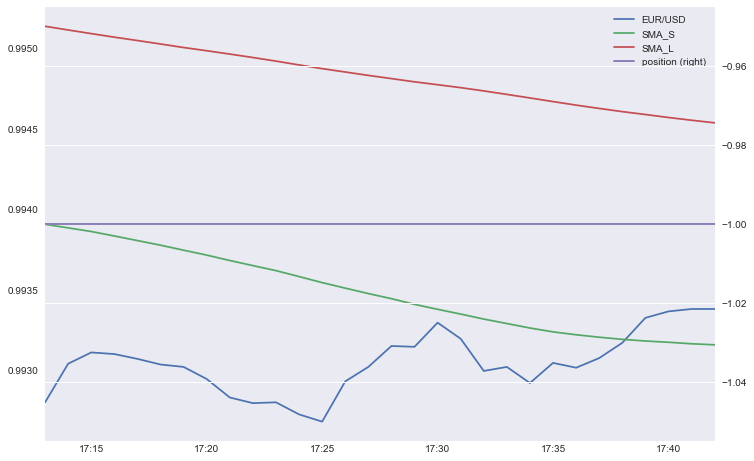

In [9]:
trader.data.tail(30).plot(figsize = (12, 8), secondary_y = "position")
plt.show()

__Strategy 2__: Bollinger Bands SMA 20 (minutes) / 1 Standard Deviation (200 ticks) 

## Stop here if you don´t want to see the solution!

###############################################################

In [10]:
class BollTrader():
    
    def __init__(self, instrument, bar_length, SMA, dev, units):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        self.units = units
        self.position = 0
        
        #*****************add strategy-specific attributes here******************
        self.SMA = SMA
        self.dev = dev
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() 
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.raw_data.index[-1]  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["SMA"] = df[self.instrument].rolling(self.SMA).mean()
        df["Lower"] = df["SMA"] - df[self.instrument].rolling(self.SMA).std() * self.dev
        df["Upper"] = df["SMA"] + df[self.instrument].rolling(self.SMA).std() * self.dev
        df["distance"] = df[self.instrument] - df.SMA
        df["position"] = np.where(df[self.instrument] < df.Lower, 1, np.nan)
        df["position"] = np.where(df[self.instrument] > df.Upper, -1, df["position"])
        df["position"] = np.where(df.distance * df.distance.shift(1) < 0, 0, df["position"])
        df["position"] = df.position.ffill().fillna(0)
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING LONG")  
            elif self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING LONG")  
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING SHORT")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING SHORT")  
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            self.position = 0

    def report_trade(self, order, going):
        time = order.get_time()
        units = api.get_open_positions().amountK.iloc[-1]
        price = api.get_open_positions().open.iloc[-1]
        unreal_pl = api.get_open_positions().grossPL.sum()
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | Unreal. P&L = {}".format(time, units, price, unreal_pl))
        print(100 * "-" + "\n")
        

In [11]:
trader = BollTrader("EUR/USD", "1min", SMA = 20, dev = 1, units = 100)

In [12]:
trader.get_most_recent()
api.subscribe_market_data(trader.instrument, (trader.get_tick_data, ))

1 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


2 3 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


4 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


5 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


6 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


7 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
Exception in thread Thread-8448:
Traceback (most recent call last):
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 703, in urlopen
    httplib_response = self._make_request(
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 449, in _make_request
    six.raise_from(e, None)
  File "<string>", line 3, in raise_from
  File "C:\Users\Ashwin Dev\anaconda3\lib\site-packages\urllib3\connectionpool.py", line 444, in _make_request
    httplib_response = conn.getresponse()
  File "C:\Users\Ashwin Dev\anaconda3\lib\http\client.py", line 1377, in getresponse
    response.begin()
  File "C:\Users\Ashwin Dev\anaconda3\lib\http\client.py", 

8 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


9 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


10 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


11 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


12 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


13 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


14 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,



----------------------------------------------------------------------------------------------------
2022-08-22 17:45:05.533000 | GOING SHORT
2022-08-22 17:45:05.533000 | units = 100 | price = 0.9936 | Unreal. P&L = -198
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
2022-08-22 17:45:05.533000 | GOING SHORT
2022-08-22 17:45:05.533000 | units = 100 | price = 0.9936 | Unreal. P&L = -198
----------------------------------------------------------------------------------------------------

15 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,



----------------------------------------------------------------------------------------------------
2022-08-22 17:45:10.537000 | GOING SHORT
2022-08-22 17:45:10.537000 | units = 100 | price = 0.9936 | Unreal. P&L = -198
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
2022-08-22 17:45:10.535000 | GOING SHORT
2022-08-22 17:45:10.535000 | units = 100 | price = 0.9936 | Unreal. P&L = -198
----------------------------------------------------------------------------------------------------


----------------------------------------------------------------------------------------------------
2022-08-22 17:45:11.798000 | GOING SHORT
----------------------------------------------------------------------------------------------------
2022-08-22 17:45:10.537000 | GOING SHORT
2022-08-22 17:45:10.537000 | units = 100 | price = 0.9936 | Unreal.

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


17 18 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


19 20 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


21 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


22 23 24 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,



----------------------------------------------------------------------------------------------------
2022-08-22 17:45:14.723000 | GOING SHORT
2022-08-22 17:45:14.723000 | units = 100 | price = 0.99364 | Unreal. P&L = -112
----------------------------------------------------------------------------------------------------

25 26 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,



----------------------------------------------------------------------------------------------------
2022-08-22 17:45:15.658000 | GOING SHORT
2022-08-22 17:45:15.658000 | units = 100 | price = 0.99364 | Unreal. P&L = -112
----------------------------------------------------------------------------------------------------

27 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


28 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


29 30 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


31 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


32 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


33 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


34 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


35 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


36 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


37 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


38 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


39 40 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


41 42 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


43 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


44 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


45 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


46 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


47 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


48 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


49 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,


50 51 52 53 

C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length,
C:\Users\Ashwin Dev\AppData\Local\Temp\ipykernel_19988\3068093456.py:48: FutureWarning: The frame.append method is deprecated and will be remo

54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 

In [13]:
api.unsubscribe_market_data(trader.instrument)
if len(api.get_open_positions()) != 0: # if we have final open position(s) (netting and hedging)
    api.close_all_for_symbol(trader.instrument)
    print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")
    time.sleep(20)
    print(api.get_closed_positions_summary()[col])
    trader.position = 0

72 73 

2022-08-22 17:46:24.920809 | GOING NEUTRAL

  tradeId  amountK currency  grossPL  isBuy
0             2600  EUR/USD     -386  False


In [14]:
trader.data

,EUR/USD,SMA,Lower,Upper,distance,position
2022-08-11 17:38:00,1.032190,NaN,NaN,NaN,NaN,0.0
2022-08-11 17:39:00,1.032105,NaN,NaN,NaN,NaN,0.0
2022-08-11 17:40:00,1.032250,NaN,NaN,NaN,NaN,0.0
2022-08-11 17:41:00,1.032160,NaN,NaN,NaN,NaN,0.0
2022-08-11 17:42:00,1.032410,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...,...
2022-08-22 17:41:00,0.993380,0.993052,0.992846,0.993258,0.000328,-1.0
2022-08-22 17:42:00,0.993380,0.993081,0.992872,0.993291,0.000298,-1.0
2022-08-22 17:43:00,0.993625,0.993123,0.992892,0.993354,0.000502,-1.0
2022-08-22 17:44:00,0.993710,0.993172,0.992926,0.993418,0.000538,-1.0


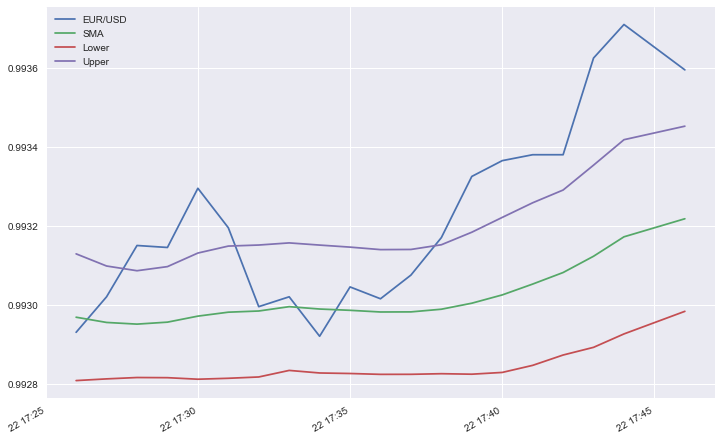

In [15]:
trader.data.tail(20)[["EUR/USD", "SMA", "Lower", "Upper"]].plot(figsize = (12, 8))
plt.show()

In [16]:
api.close()

## Machine Learning Strategies (1) - Model Fitting

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv("five_minute.csv", parse_dates = ["time"], index_col = "time")

In [3]:
data

,price
time,
2019-01-01 22:00:00+00:00,1.146580
2019-01-01 22:05:00+00:00,1.146350
2019-01-01 22:10:00+00:00,1.146320
2019-01-01 22:15:00+00:00,1.146320
2019-01-01 22:20:00+00:00,1.146530
...,...
2019-12-30 23:35:00+00:00,1.120180
2019-12-30 23:40:00+00:00,1.120210
2019-12-30 23:45:00+00:00,1.120295


In [4]:
data["returns"] = np.log(data.div(data.shift(1)))

In [5]:
data.dropna(inplace = True)

In [6]:
data["direction"] = np.sign(data.returns)

In [7]:
data

,price,returns,direction
time,,,
2019-01-01 22:05:00+00:00,1.146350,-0.000201,-1.0
2019-01-01 22:10:00+00:00,1.146320,-0.000026,-1.0
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0
...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0


In [8]:
lags = 2

In [9]:
cols = []
for lag in range(1, lags + 1):
    col = "lag{}".format(lag)
    data[col] = data.returns.shift(lag)
    cols.append(col)
data.dropna(inplace = True)

In [10]:
data

,price,returns,direction,lag1,lag2
time,,,,,
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0,-0.000026,-0.000201
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0,0.000000,-0.000026
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0,0.000183,0.000000
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048
...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004


In [11]:
lm = LogisticRegression(C = 1e6, max_iter = 100000, multi_class = "ovr")

In [12]:
lm.fit(data[cols], data.direction)

LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

In [13]:
lm

LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

__In-Sample "Prediction"__

In [14]:
data["pred"] = lm.predict(data[cols])

In [15]:
data

,price,returns,direction,lag1,lag2,pred
time,,,,,,
2019-01-01 22:15:00+00:00,1.146320,0.000000,0.0,-0.000026,-0.000201,1.0
2019-01-01 22:20:00+00:00,1.146530,0.000183,1.0,0.000000,-0.000026,1.0
2019-01-01 22:25:00+00:00,1.146475,-0.000048,-1.0,0.000183,0.000000,-1.0
2019-01-01 22:30:00+00:00,1.146455,-0.000017,-1.0,-0.000048,0.000183,1.0
2019-01-01 22:35:00+00:00,1.146455,0.000000,0.0,-0.000017,-0.000048,1.0
...,...,...,...,...,...,...
2019-12-30 23:35:00+00:00,1.120180,-0.000004,-1.0,-0.000112,-0.000018,1.0
2019-12-30 23:40:00+00:00,1.120210,0.000027,1.0,-0.000004,-0.000112,1.0
2019-12-30 23:45:00+00:00,1.120295,0.000076,1.0,0.000027,-0.000004,-1.0


In [16]:
hits = np.sign(data.direction * data.pred).value_counts()

In [17]:
hits

 1.0    37469
-1.0    34289
 0.0     1959
dtype: int64

In [18]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5082816717989066

In [19]:
lm

LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

__Saving the model__

In [20]:
import pickle

In [21]:
pickle.dump(lm, open("logreg.pkl", "wb"))

## Machine Learning Strategies (2) - Implementation

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import fxcmpy
import time
from datetime import datetime
import pickle

In [2]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [3]:
col = ["tradeId", "amountK", "currency", "grossPL", "isBuy"]

In [3]:
class MLTrader():
    
    def __init__(self, instrument, bar_length, lags, model, units):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        self.units = units
        self.position = 0
        
        #*****************add strategy-specific attributes here******************
        self.lags = lags
        self.model = model
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        # if a time longer than the bar_lenght has elapsed between last full bar and the most recent tick
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() 
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.raw_data.index[-1]  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df = df.append(self.tick_data.iloc[-1]) # append latest tick (== open price of current bar)
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        cols = []
        for lag in range(1, self.lags + 1):
            col = "lag{}".format(lag)
            df[col] = df.returns.shift(lag)
            cols.append(col)
        df.dropna(inplace = True)
        df["position"] = lm.predict(df[cols])
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING LONG")  
            elif self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING LONG")  
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING SHORT")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING SHORT")  
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL") 
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            self.position = 0

    def report_trade(self, order, going):
        time = order.get_time()
        units = api.get_open_positions().amountK.iloc[-1]
        price = api.get_open_positions().open.iloc[-1]
        unreal_pl = api.get_open_positions().grossPL.sum()
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | Unreal. P&L = {}".format(time, units, price, unreal_pl))
        print(100 * "-" + "\n")
        

In [4]:
lm = pickle.load(open("logreg.pkl", "rb"))

In [5]:
lm

LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

In [6]:
trader = MLTrader("EUR/USD", "5min", lags = 2, model = lm, units = 100)

In [7]:
trader.model

LogisticRegression(C=1000000.0, max_iter=100000, multi_class='ovr')

In [8]:
trader.get_most_recent()
api.subscribe_market_data(trader.instrument, (trader.get_tick_data, ))

ConnectionError: ('Connection aborted.', ConnectionResetError(10054, 'An existing connection was forcibly closed by the remote host', None, 10054, None))

packet queue is empty, aborting


In [ ]:
api.unsubscribe_market_data(trader.instrument)
if len(api.get_open_positions()) != 0: # if we have final open position(s) (netting and hedging)
    api.close_all_for_symbol(trader.instrument)
    print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")
    time.sleep(20)
    print(api.get_closed_positions_summary()[col])
    trader.position = 0

In [ ]:
trader.data.tail(10)

In [ ]:
api.close()

##########################################################################################################

(you can find the corresponding Video for the following lines of code in __Section 23__: Cloud Deployment (AWS) | Scheduling Trading Sessions | Full Automation)

## How to Time/Schedule the End of a Trading Session (Simple Contrarian)

In [ ]:
import pandas as pd
import numpy as np
import fxcmpy
import time
from datetime import datetime

In [ ]:
api = fxcmpy.fxcmpy(config_file= "fxcm.cfg")

In [ ]:
col = ["tradeId", "amountK", "currency", "grossPL", "isBuy"]

In [ ]:
datetime.utcnow().time() # current utc time

In [ ]:
pd.to_datetime("17:30").time() # desired end of trading session (in utc time)

In [ ]:
if datetime.utcnow().time() >= pd.to_datetime("17:30").time():
    print("Stop the Trading Session!")

In [ ]:
class ConTrader():
    
    def __init__(self, instrument, bar_length, window, units):
        self.instrument = instrument
        self.bar_length = pd.to_timedelta(bar_length) 
        self.tick_data = None
        self.raw_data = None
        self.data = None 
        self.ticks = 0
        self.last_bar = None  
        self.units = units
        self.position = 0
        
        #*****************add strategy-specific attributes here******************
        self.window = window
        #************************************************************************        
    
    def get_most_recent(self, period = "m1", number = 10000):
        while True:  
            time.sleep(5)
            df = api.get_candles(self.instrument, number = number, period = period, columns = ["bidclose", "askclose"])
            df[self.instrument] = (df.bidclose + df.askclose) / 2
            df = df[self.instrument].to_frame()
            df = df.resample(self.bar_length, label = "right").last().dropna().iloc[:-1]
            self.raw_data = df.copy()
            self.last_bar = self.raw_data.index[-1]
            if pd.to_datetime(datetime.utcnow()) - self.last_bar < self.bar_length:
                break
    
    def get_tick_data(self, data, dataframe):
        
        self.ticks += 1
        print(self.ticks, end = " ")
        
        recent_tick = pd.to_datetime(data["Updated"], unit = "ms")
        
        # define stop
        if recent_tick.time() >= pd.to_datetime("09:27").time():
            api.unsubscribe_market_data(self.instrument)
            if len(api.get_open_positions()) != 0:
                api.close_all_for_symbol(self.instrument)
                print(2*"\n" + "{} | GOING NEUTRAL".format(str(datetime.utcnow())) + "\n")
                time.sleep(20)
                print(api.get_closed_positions_summary()[col])
                self.position = 0
                api.close()
        
        if recent_tick - self.last_bar > self.bar_length:
            self.tick_data = dataframe.loc[self.last_bar:, ["Bid", "Ask"]]
            self.tick_data[self.instrument] = (self.tick_data.Ask + self.tick_data.Bid)/2
            self.tick_data = self.tick_data[self.instrument].to_frame()
            self.resample_and_join()
            self.define_strategy() 
            self.execute_trades()
            
    def resample_and_join(self):
        self.raw_data = self.raw_data.append(self.tick_data.resample(self.bar_length, 
                                                             label="right").last().ffill().iloc[:-1])
        self.last_bar = self.raw_data.index[-1]  
        
    def define_strategy(self): # "strategy-specific"
        df = self.raw_data.copy()
        
        #******************** define your strategy here ************************
        df["returns"] = np.log(df[self.instrument] / df[self.instrument].shift())
        df["position"] = -np.sign(df.returns.rolling(self.window).mean())
        #***********************************************************************
        
        self.data = df.copy()
    
    def execute_trades(self):
        if self.data["position"].iloc[-1] == 1:
            if self.position == 0:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING LONG")  
            elif self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING LONG")  
            self.position = 1
        elif self.data["position"].iloc[-1] == -1: 
            if self.position == 0:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING SHORT")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units * 2)
                self.report_trade(order, "GOING SHORT")  
            self.position = -1
        elif self.data["position"].iloc[-1] == 0: 
            if self.position == -1:
                order = api.create_market_buy_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            elif self.position == 1:
                order = api.create_market_sell_order(self.instrument, self.units)
                self.report_trade(order, "GOING NEUTRAL")  
            self.position = 0

    def report_trade(self, order, going):  
        time = order.get_time()
        units = api.get_open_positions().amountK.iloc[-1]
        price = api.get_open_positions().open.iloc[-1]
        unreal_pl = api.get_open_positions().grossPL.sum()
        print("\n" + 100* "-")
        print("{} | {}".format(time, going))
        print("{} | units = {} | price = {} | Unreal. P&L = {}".format(time, units, price, unreal_pl))
        print(100 * "-" + "\n")
        

In [ ]:
trader = ConTrader("EUR/USD", bar_length = "1min", window = 1, units = 100)

In [ ]:
trader.get_most_recent()
api.subscribe_market_data(trader.instrument, (trader.get_tick_data, ))

In [ ]:
api.close()